In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv("../../data/placement.csv")

In [3]:
df.sample(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

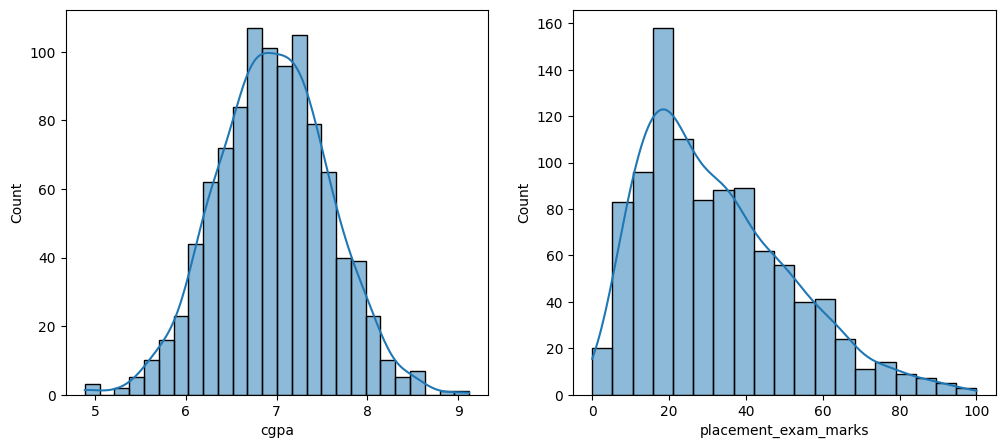

In [5]:

plt.figure(figsize=(12,5))

plt.subplot(121)
sns.histplot(x=df['cgpa'],kde=True)

plt.subplot(122)
sns.histplot(x=df['placement_exam_marks'],kde=True)

In [7]:
df['placement_exam_marks'].skew() #it is right skewed

np.float64(0.8356419499466834)

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

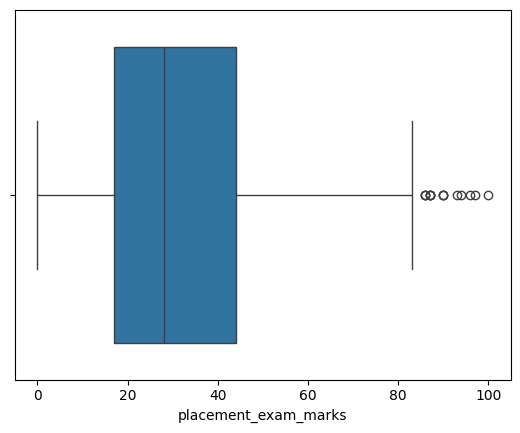

In [10]:
sns.boxplot(x=df['placement_exam_marks'])

Since this column was right skewed, we can see the outliers on the right side. Next we will fetch them and do operations (either trimming or capping).

In [12]:
# Finding IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [13]:
percentile25,percentile75

(np.float64(17.0), np.float64(44.0))

In [14]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [15]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [17]:
print(f'upperlimit:{upper_limit}\nlowerlimit:{lower_limit}')

upperlimit:84.5
lowerlimit:-23.5


### Finding outliers

In [19]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [20]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming

In [22]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


SEe the 15 outliers were removed from the dataset.

### Capping

In [24]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [25]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks'>

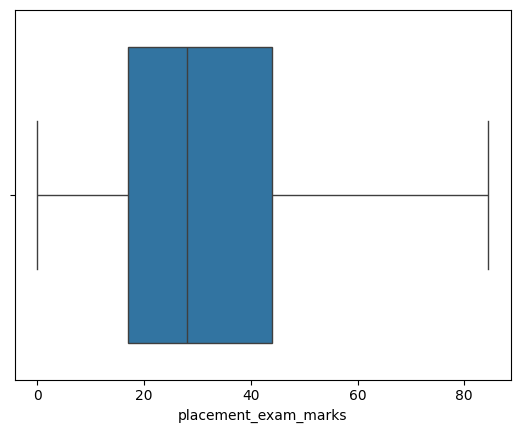

In [26]:
sns.boxplot(x = new_df_cap['placement_exam_marks'])